In [0]:
import pandas as pd
import numpy as np
import csv

%tensorflow_version 2.x
import tensorflow as tf
tf.__version__
assert tf.__version__ >= "2.0"

from google.colab import drive
drive.mount('/content/drive')

TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x_train = pd.read_csv('/content/drive/My Drive/bilstm_data/x_train.csv')
x_test = pd.read_csv('/content/drive/My Drive/bilstm_data/x_test.csv')
x_val = pd.read_csv('/content/drive/My Drive/bilstm_data/x_val.csv')


y_train = pd.read_csv('/content/drive/My Drive/bilstm_data/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/bilstm_data/y_test.csv')
y_val = pd.read_csv('/content/drive/My Drive/bilstm_data/y_val.csv')


In [0]:
x_train['heading'] = x_train['heading'].str.replace('GUEST EDITORIAL:', '')
x_train['heading'] = x_train['heading'].str.replace('EDITORIAL:', '')
x_train['heading'] = x_train['heading'].str.replace('Op-Ed:', '')
x_train['heading'] = x_train['heading'].str.replace('Editorial:', '')
x_train['heading'] = x_train['heading'].str.replace('Opinion:', '')
x_train['heading'] = x_train['heading'].str.replace('Opinion', '')
x_train['heading'] = x_train['heading'].str.replace('Editorial', '')
x_train['heading'] = x_train['heading'].str.replace('Opioid', '')
x_train['heading'] = x_train['heading'].str.replace('LETTER', '')
x_train['heading'] = x_train['heading'].str.replace('Letter to the Editor:', '')
x_train['heading'] = x_train['heading'].str.replace('COLUMN:', '')

x_val['heading'] = x_val['heading'].str.replace('GUEST EDITORIAL:', '')
x_val['heading'] = x_val['heading'].str.replace('EDITORIAL:', '')
x_val['heading'] = x_val['heading'].str.replace('Op-Ed:', '')
x_val['heading'] = x_val['heading'].str.replace('Editorial:', '')
x_val['heading'] = x_val['heading'].str.replace('Opinion:', '')
x_val['heading'] = x_val['heading'].str.replace('Opinion', '')
x_val['heading'] = x_val['heading'].str.replace('Editorial', '')
x_val['heading'] = x_val['heading'].str.replace('Opioid', '')
x_val['heading'] = x_val['heading'].str.replace('LETTER', '')
x_val['heading'] = x_val['heading'].str.replace('Letter to the Editor:', '')
x_val['heading'] = x_val['heading'].str.replace('COLUMN:', '')

x_test['heading'] = x_test['heading'].str.replace('GUEST EDITORIAL:', '')
x_test['heading'] = x_test['heading'].str.replace('EDITORIAL:', '')
x_test['heading'] = x_test['heading'].str.replace('Op-Ed:', '')
x_test['heading'] = x_test['heading'].str.replace('Editorial:', '')
x_test['heading'] = x_test['heading'].str.replace('Opinion:', '')
x_test['heading'] = x_test['heading'].str.replace('Opinion', '')
x_test['heading'] = x_test['heading'].str.replace('Editorial', '')
x_test['heading'] = x_test['heading'].str.replace('Opioid', '')
x_test['heading'] = x_test['heading'].str.replace('LETTER', '')
x_test['heading'] = x_test['heading'].str.replace('Letter to the Editor:', '')
x_test['heading'] = x_test['heading'].str.replace('COLUMN:', '')


In [0]:
texts = x_train['article_text'].values
texts_test = x_test['article_text'].values

In [0]:
texts_header = x_train['heading'].values
texts_header_test = x_test['heading'].values
texts_header_val = x_val['heading'].values

In [0]:
texts_val = x_val['article_text'].values
labels_val = y_val['label'].values

In [0]:
labels_test = y_test['label'].values
labels = y_train['label'].values

In [0]:
print(labels.shape, labels_test.shape, labels_test.shape)

(5746,) (3429,) (3429,)


In [0]:
print(texts_header.shape, texts_header_val.shape, texts_header_test.shape)

(5746,) (639,) (3429,)


In [0]:
len(y_test.loc[y_test['label']==0])

3076

In [0]:
len(y_test.loc[y_test['label']==1])

353

In [0]:
MAX_NUM_WORDS = 3000 # how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 128 # max number of words in a review to use

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer_train = Tokenizer(num_words=MAX_NUM_WORDS) #convert word(string to int)
tokenizer_train.fit_on_texts(texts) 
sequences = tokenizer_train.texts_to_sequences(texts) 

word_index = tokenizer_train.word_index #convert this to dict
print('Found %s unique tokens.' % len(word_index))


Found 85423 unique tokens.


In [0]:
sequences3 = tokenizer_train.texts_to_sequences(texts_val) 
sequences_test = tokenizer_train.texts_to_sequences(texts_test)

In [0]:
'''
tokenizer_header_train = Tokenizer(num_words=MAX_HEADER_LENGTH) #convert word(string to int)
tokenizer_header_train.fit_on_texts(texts_header) 
sequences_header_train = tokenizer_header_train.texts_to_sequences(texts_header) 

word_index2 = tokenizer_header_train.word_index #convert this to dict
word_index.update(word_index2)
print('Found %s unique tokens.' % len(word_index2))
'''

"\ntokenizer_header_train = Tokenizer(num_words=MAX_HEADER_LENGTH) #convert word(string to int)\ntokenizer_header_train.fit_on_texts(texts_header) \nsequences_header_train = tokenizer_header_train.texts_to_sequences(texts_header) \n\nword_index2 = tokenizer_header_train.word_index #convert this to dict\nword_index.update(word_index2)\nprint('Found %s unique tokens.' % len(word_index2))\n"

In [0]:
sequences_header_train = tokenizer_train.texts_to_sequences(texts_header) 
sequences_header_test = tokenizer_train.texts_to_sequences(texts_header_test) 
sequences_header_val = tokenizer_train.texts_to_sequences(texts_header_val) 

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
data_header = pad_sequences(sequences_header_train, maxlen = MAX_SEQUENCE_LENGTH, padding='pre')
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of header tensor:', data_header.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (5746, 128)
Shape of header tensor: (5746, 128)
Shape of label tensor: (5746, 2)


In [0]:
data2 = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
data2_header = pad_sequences(sequences_header_test, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
labels2 = to_categorical(np.asarray(labels_test))
print('Shape of data tensor:', data2.shape)
print('Shape of header tensor:', data2_header.shape)
print('Shape of label tensor:', labels2.shape)

data3 = pad_sequences(sequences3, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
data3_header = pad_sequences(sequences_header_val, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
labels3 = to_categorical(np.asarray(labels_val))
print('Shape of data tensor:', data3.shape)
print('Shape of header tensor:', data3_header.shape)
print('Shape of label tensor:', labels3.shape)


Shape of data tensor: (3429, 128)
Shape of header tensor: (3429, 128)
Shape of label tensor: (3429, 2)
Shape of data tensor: (639, 128)
Shape of header tensor: (639, 128)
Shape of label tensor: (639, 2)


In [0]:
x_train_article = data
x_train_header = data_header
y_train = labels

x_val_article = data3
x_val_header = data3_header
y_val = labels3

x_test_article = data2
x_test_header = data2_header
y_test = labels2

In [0]:
print(y_train.shape, y_val.shape, y_test.shape)

(5746, 2) (639, 2) (3429, 2)


In [0]:
print(x_train_article.shape, x_train_header.shape, x_val_article.shape, x_val_header.shape)

(5746, 128) (5746, 128) (639, 128) (639, 128)


In [0]:
GLOVE_DIR='drive/My Drive/yelp_review_polarity_csv/'

import os
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.42B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Found 1917494 word vectors.


In [0]:
EMBEDDING_DIM = 300 # how big is each word vector

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.backend import sum

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('Siamese_with_128.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

inp1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedded_sequences = embedding_layer(inp1)

x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(x)
x = GlobalMaxPool1D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)


inp2 = Input(shape=(MAX_SEQUENCE_LENGTH,))
y = embedded_sequences = embedding_layer(inp2)

y = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(y)
y = GlobalMaxPool1D()(y)
y = Dense(64, activation="relu")(y)
y = Dropout(0.5)(y)

res = concatenate([x, y])
res = Dense(2, activation="softmax")(res)
model = Model(inputs=[inp1, inp2], outputs=res)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 128, 300)     25627200    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 128, 128)     186880      embedding[0][0]              

In [0]:
history = model.fit([x_train_article, x_train_header], y_train, validation_data=[[x_val_article, x_val_header], y_val], epochs=10, callbacks=[es, mc], batch_size=64)

Train on 5746 samples, validate on 639 samples
Epoch 1/10
5696/5746 [============================>.] - ETA: 0s - loss: 0.5346 - accuracy: 0.7231
Epoch 00001: val_accuracy improved from -inf to 0.87480, saving model to Siamese_with_128.h5
5746/5746 [==============================] - 84s 15ms/sample - loss: 0.5319 - accuracy: 0.7245 - val_loss: 0.3144 - val_accuracy: 0.8748
Epoch 2/10
5696/5746 [============================>.] - ETA: 0s - loss: 0.3276 - accuracy: 0.8622
Epoch 00002: val_accuracy did not improve from 0.87480
5746/5746 [==============================] - 74s 13ms/sample - loss: 0.3278 - accuracy: 0.8622 - val_loss: 0.3147 - val_accuracy: 0.8701
Epoch 3/10
5696/5746 [============================>.] - ETA: 0s - loss: 0.2732 - accuracy: 0.8959
Epoch 00003: val_accuracy improved from 0.87480 to 0.89671, saving model to Siamese_with_128.h5
5746/5746 [==============================] - 74s 13ms/sample - loss: 0.2747 - accuracy: 0.8954 - val_loss: 0.2554 - val_accuracy: 0.8967
Epoc

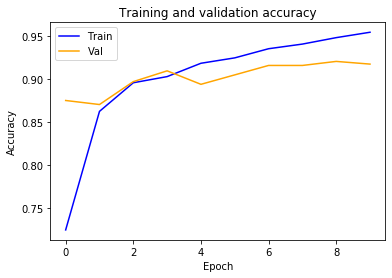

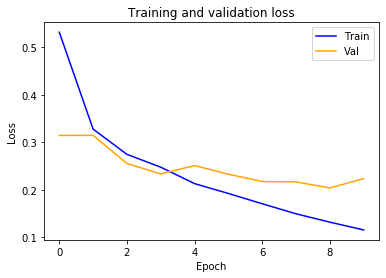

In [0]:
import matplotlib.pyplot as plt

def plot(history):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)

In [0]:
from tensorflow.keras.models import load_model
saved_model = load_model('/content/Siamese_with_128.h5')

In [0]:
y_test_new = np.argmax(y_test, axis=1)
y_test[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
y_test_new[0:5]

array([0, 0, 0, 1, 0])

In [0]:
prediction = saved_model.predict([x_test_article, x_test_header])
prediction[0:5]

array([[9.2971611e-01, 7.0283882e-02],
       [9.5487529e-01, 4.5124732e-02],
       [9.9895430e-01, 1.0456453e-03],
       [7.3435855e-05, 9.9992657e-01],
       [9.9200624e-01, 7.9937782e-03]], dtype=float32)

In [0]:
y_pred=np.argmax(prediction, axis=1)

In [0]:
np.sum(y_pred)

694

In [0]:
np.sum(y_test_new)

353

In [0]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test_new,y_pred)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[2714  362]
 [  21  332]]


In [0]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test_new, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test_new, y_pred, average='weighted'))

(0.7353539610871982, 0.9114123047112433, 0.7841417250851684, None)
(0.9394144168758333, 0.8883056284631088, 0.9032174215159541, None)


In [0]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_new, y_pred).ravel()
pre = tp / (tp + fp)
rec = tp / (tp + fn)
tnr = tn / (tn + fp)
acc = (tp + tn)/ (tp + tn + fp + fn)
balanced_acc = (rec + tnr) / 2
f1 = 2 * (pre * rec)/(pre+rec)

print(pre, rec, tnr, acc, balanced_acc, f1)

0.4783861671469741 0.9405099150141643 0.8823146944083224 0.8883056284631088 0.9114123047112433 0.6341929321872015


In [0]:
print(tp, tn, fp, fn)

332 2714 362 21


In [0]:
import math
num = (tp*tn - fp*fn)
den = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(num, den)
mcc = num/den
print(mcc)

893446 1435618.0789193204
0.6223423994998396
